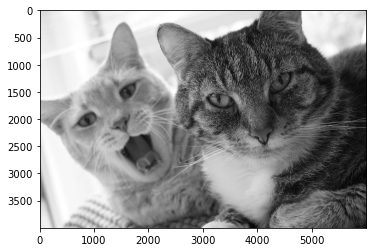

In [12]:
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

image = cv2.imread("cattus.jpg")

# Question 1
# converting the image to grey
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray', vmin=0,vmax=255)

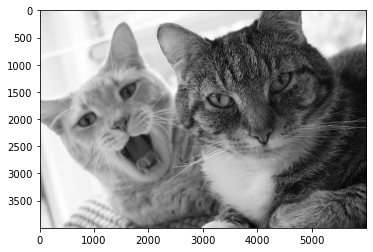

In [2]:
# According to the formular a and b is 0
# Find the biggest and smallest pixel in the given graph
max = np.amax(gray_image)
min = np.amin(gray_image)

# According to the formular (b-a)/(d-c)
ans = (255 - 0) / (255 - 0)

for i in range(4000):
    for j in range(6000):
        gray_image[i][j] = (gray_image[i][j] - 0)* ans + max

plt.imshow(gray_image, cmap='gray', vmin = 0, vmax = 255)

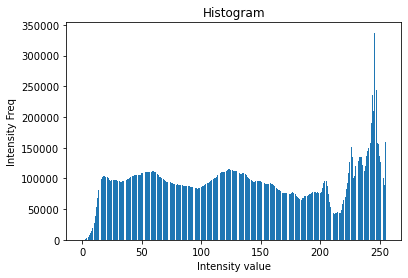

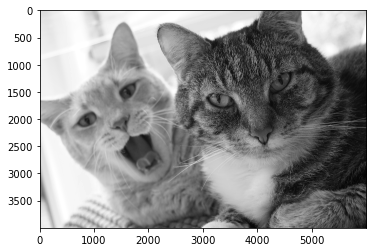

In [3]:
# Question 2
# Original image start with intensity value a and end with intensity value b
# The range is from 0 to 255

# 2.1
gray = cv2.imread("cattus.jpg", 0)

dic = [0]*256

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        dic[gray[i][j]] += 1
    
plt.figure()
plt.title("Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Intensity Freq")
plt.bar(range(len(dic)), dic)
plt.savefig("Gray_Histogram.jpg")

plt.show()
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

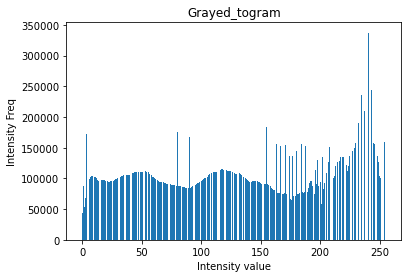

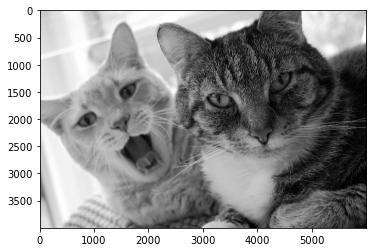

In [4]:
# Use the discrete method to do the Histogram equalization
# 2.2
# Calculate the gray level value
g_l = dic
L = 256

# calculate all pixel numbers
all_pix = 4000*6000

# calculate the frequency distribution of gray level
for i in range(len(dic)):
    g_l[i] /= all_pix

# calculate the sum of gray level accumlated frequency
for i in range(1,len(dic)):
    g_l[i] += g_l[i-1]
 
# times L-1
for i in range(0,len(dic)):
    g_l[i] *= (255-1)

# Give the apporimate value for the list
for i in range(0,len(dic)):
    g_l[i] = round(g_l[i], 0)

im = gray.copy()
im_list = [0]*256
    
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        im[i][j] = g_l[gray[i][j]]
        im_list[im[i][j]] += 1
  
plt.figure()
plt.title("Grayed_togram")
plt.xlabel("Intensity value")
plt.ylabel("Intensity Freq")
plt.bar(range(len(im_list)), im_list)

plt.show()
plt.imshow(im, cmap = "gray", vmin=0, vmax = 255)

# The right top one is the most similar

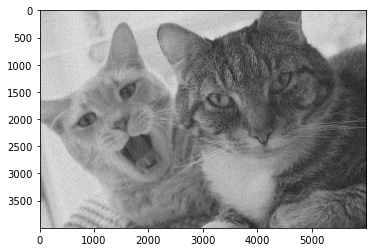

In [5]:
# Quewstion 3
img_rgb = cv2.imread("cattus.jpg")

def PepperandSalt(imag,prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1- prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = 255
            elif rdn < prob:
                output[i][j] = 0
            else:
                output[i][j] = image[i][j]
    return output

img_rgb = PepperandSalt(img_rgb, 0.15)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb, cmap="gray", vmin=0, vmax=255)

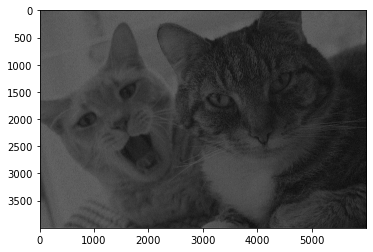

In [6]:
# mean filter 3*3
def mean_filter(img_rgb, x, y):
    width = img_rgb.shape[0]
    height = img_rgb.shape[1]
    
    check_list = []
    final_list = []
    
    startx = x // 2
    starty = y // 2
    
    for i in range(startx, width-startx):
        for j in range(starty, height-starty):
            for m in range(0,startx):
                for n in range(0,starty):
                    check_list.append(img_rgb[i-m][j-n])
                    check_list.append(img_rgb[i+m][j-n])
                    check_list.append(img_rgb[i-m][j+n])
                    check_list.append(img_rgb[i+m][j+n])
            num = sum(check_list)//(x*y)
            final_list.append(num)
            check_list = []
            img_rgb[i][j] = num
            
    return img_rgb

im1 = img_rgb.copy()
k = mean_filter(im1, 3, 3)
plt.imshow(k, cmap="gray",vmin=0,vmax=255)

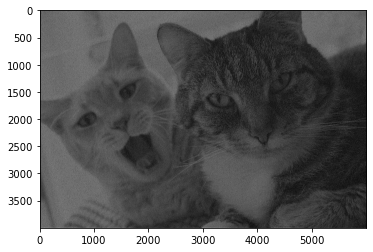

In [7]:
# Mean filter 5*5
im2 = img_rgb.copy()
k = mean_filter(im2, 5, 5)
plt.imshow(k, cmap="gray",vmin=0,vmax=255)

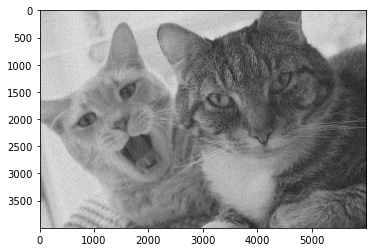

In [10]:
# median filter
# r=cv2.medianBlur(img_rgb,3)
# plt.imshow(r)
def median_filter(img, x, y):
    img_rgb = img.copy()
    width = img_rgb.shape[0]
    height = img_rgb.shape[1]
    
    check_list = []
    final_list = []
    
    startx = x // 2
    starty = y // 2
    
    for i in range(startx, width-startx):
        for j in range(starty, height-starty):
            check_list.append(img_rgb[i][j])
            for m in range(startx):
                for n in range(starty):
                    check_list.append(img_rgb[i-m][j-n])
                    check_list.append(img_rgb[i+m][j-n])
                    check_list.append(img_rgb[i-m][j+n])
                    check_list.append(img_rgb[i+m][j+n])
            check_list.sort()
            num = check_list[len(check_list)//2]
            final_list.append(num)
            check_list = []
            img_rgb[i][j] = num
    return img_rgb

im3 = img_rgb.copy()
k = median_filter(im3, 3, 3)
plt.imshow(k, cmap="gray",vmin=0,vmax=255)

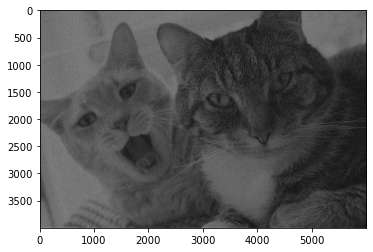

In [13]:
# Guassian filter
def guassian_filter(img, x, a):
    img_rgb = img.copy()
    width = img_rgb.shape[0]
    height = img_rgb.shape[1]
    
    start = x // 2
    
    window = np.zeros((x,x), dtype=np.float)
    tmp = np.reshape(np.asarray(img_rgb), img_rgb.shape)
    img_rgb = tmp.copy().astype(np.float)
    
    Front = (2 * a**2 * math.pi)
    for i in range(-x+start, start):
        for j in range(-x+start, start):
            g = math.exp(-(i**2 + j**2)/(2*(a**2)))
            g /= Front
            window[i][j] = g
    
    for i in range(width-x):
        for j in range(height-x):
            img_rgb[i][j] = np.sum(window * tmp[i:i+x, j:j+x])
    
    img_rgb = np.clip(img_rgb, 0, 255)

    return img_rgb

im4 = img_rgb.copy()
r = guassian_filter(im4, 3, 0.8)
plt.imshow(r, cmap="gray",vmin=0,vmax=255)

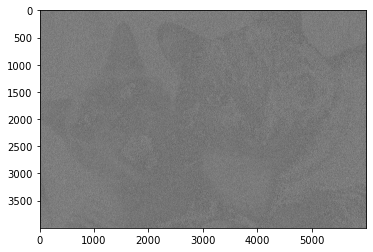

In [11]:
# Question 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aim Cut the boundary in graph, make the filter 
img = cv2.imread("Gray_Cat.jpg", 0)

def filter_detection_sobel(image):
    width = image.shape[0]
    height = image.shape[1]
    
    for i in range (1, width-1):
        for j in range (1, height-1):
            Gx = image[i+1][j-1]+2*image[i+1][j]+image[i+1][j+1]-(image[i-1][j-1]+2*image[i-1][j]+image[i-1][j+1])
            
            Gy = image[i-1][j+1]+2*image[i][j+1]+image[i+1][j+1]-(image[i-1][j-1]+2*image[i][j-1]+image[i+1][j-1])
            
            image[i][j] = abs(Gx)*0.9 + abs(Gy)*0.1
            
            
    return image

im = filter_detection_sobel(k)
plt.imshow(im, cmap="gray")